<h1 style="background: linear-gradient(180deg, #005580 0%, #006699 75%, rgba(0, 153, 230, 1) 100%); color: white; font-family: 'Raleway', sans-serif; padding: 10px 20px; border-radius: 10px; text-align: center; font-weight:500; margin: 20px">
    Modelado Predictivo
</h1>
Daniela Grisel Flores Quiroz , Carlos Francisco López , Miguel Arturo Romero Carreón , José Armando Ramírez Islas

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
path_ingresos = '../data/conjunto_de_datos_enigh_ns_2020_csv/conjunto_de_datos_ingresos_enigh_2020_ns/conjunto_de_datos/conjunto_de_datos_ingresos_enigh_2020_ns.csv'

raw_ingresos = pd.read_csv(path_ingresos)
raw_ingresos.describe()

,folioviv,foliohog,numren,ing_1,ing_tri
count,3.949120e+05,394912.000000,394912.000000,3.949120e+05,3.949120e+05
mean,1.619207e+09,1.012550,2.018032,4.638020e+03,9.448521e+03
std,9.355868e+08,0.124363,1.314929,1.408272e+04,3.175662e+04
min,1.000136e+08,1.000000,1.000000,0.000000e+00,4.800000e-01
25%,8.040779e+08,1.000000,1.000000,3.300000e+02,9.890100e+02
50%,1.602378e+09,1.000000,2.000000,2.400000e+03,3.239990e+03
75%,2.404034e+09,1.000000,3.000000,6.000000e+03,1.173913e+04
max,3.260771e+09,5.000000,19.000000,3.642150e+06,1.068892e+07


In [14]:
raw_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394912 entries, 0 to 394911
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   folioviv  394912 non-null  int64  
 1   foliohog  394912 non-null  int64  
 2   numren    394912 non-null  int64  
 3   clave     394912 non-null  object 
 4   mes_1     394912 non-null  object 
 5   mes_2     394912 non-null  object 
 6   mes_3     394912 non-null  object 
 7   mes_4     394912 non-null  object 
 8   mes_5     394912 non-null  object 
 9   mes_6     394912 non-null  object 
 10  ing_1     394912 non-null  int64  
 11  ing_2     394912 non-null  object 
 12  ing_3     394912 non-null  object 
 13  ing_4     394912 non-null  object 
 14  ing_5     394912 non-null  object 
 15  ing_6     394912 non-null  object 
 16  ing_tri   394912 non-null  float64
dtypes: float64(1), int64(4), object(12)
memory usage: 51.2+ MB


Tenemos 394912 registros en la tabla, de los cuáles no hay valores nulos aparentemente. Sin embargo puede haber conflicto en los tipos de datos, ya que ing_1 es numérico y todos los demás son objetos (strings). Hay que visualizar mejor los datos de esas columnas para saber cómo tratarlos

In [15]:
cols_conflicto = [f'ing_{x}' for x in range(1, 7)]
raw_ingresos[cols_conflicto]

,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6
0,0,3200,3200,3200,3200,0
1,300,300,300,300,300,300
2,0,0,0,0,0,1000
3,3200,0,0,0,0,0
4,0,0,11000,0,0,0
...,...,...,...,...,...,...
394907,2800,1700,0,0,0,0
394908,500,500,500,1000,1000,500
394909,4800,4800,4800,4800,4800,4800
394910,7000,7000,7000,7000,7000,7000


Hay un problema con los espacios en blanco. Al ser espacios en blanco y no propiamente nulos, el tipo de dato cambia y genera este conflicto. Pero ¿por qué están esos nulos?

NOTA: Tratar los nulos de una manera más compleja


In [16]:
for column in raw_ingresos.columns.values:
    raw_ingresos[column] = raw_ingresos[column].replace('', None)
    raw_ingresos[column] = raw_ingresos[column].replace(' ', None)

In [17]:
n_filas = raw_ingresos.shape[0]
n_nulos = raw_ingresos.isnull().sum()
p_nulos = n_nulos * 100 / n_filas

p_nulos

folioviv     0.000000
foliohog     0.000000
numren       0.000000
clave        0.000000
mes_1       16.728031
mes_2       16.728031
mes_3       16.728031
mes_4       16.728031
mes_5       16.728031
mes_6       16.728031
ing_1        0.000000
ing_2       16.728031
ing_3       16.728031
ing_4       16.728031
ing_5       16.728031
ing_6       16.728031
ing_tri      0.000000
dtype: float64

Ahora convertimos el tipo de dato object a float

In [18]:
raw_ingresos[cols_conflicto] = raw_ingresos[cols_conflicto].astype(float)

In [19]:
raw_ingresos.drop(['folioviv', 'foliohog', 'numren'], axis=1).describe()

,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6,ing_tri
count,3.949120e+05,3.288510e+05,3.288510e+05,3.288510e+05,3.288510e+05,3.288510e+05,3.949120e+05
mean,4.638020e+03,3.826257e+03,3.737320e+03,3.619290e+03,3.489071e+03,3.581238e+03,9.448521e+03
std,1.408272e+04,1.330216e+04,1.347200e+04,1.989094e+04,1.204495e+04,1.420564e+04,3.175662e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e-01
25%,3.300000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.890100e+02
50%,2.400000e+03,1.500000e+03,1.410000e+03,1.180000e+03,1.000000e+03,1.029000e+03,3.239990e+03
75%,6.000000e+03,5.050000e+03,5.000000e+03,5.000000e+03,4.800000e+03,5.000000e+03,1.173913e+04
max,3.642150e+06,3.642150e+06,3.642150e+06,8.000000e+06,3.642150e+06,3.642150e+06,1.068892e+07


In [29]:
# Dataframe para análisis de los ingresos
df_ingresos = raw_ingresos.drop(['folioviv', 'foliohog', 'numren', 'clave', 'mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6', 'ing_tri'], axis=1).copy()

In [30]:
df_ingresos.describe()

,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6
count,3.949120e+05,3.288510e+05,3.288510e+05,3.288510e+05,3.288510e+05,3.288510e+05
mean,4.638020e+03,3.826257e+03,3.737320e+03,3.619290e+03,3.489071e+03,3.581238e+03
std,1.408272e+04,1.330216e+04,1.347200e+04,1.989094e+04,1.204495e+04,1.420564e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.300000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.400000e+03,1.500000e+03,1.410000e+03,1.180000e+03,1.000000e+03,1.029000e+03
75%,6.000000e+03,5.050000e+03,5.000000e+03,5.000000e+03,4.800000e+03,5.000000e+03
max,3.642150e+06,3.642150e+06,3.642150e+06,8.000000e+06,3.642150e+06,3.642150e+06


In [32]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil) para cada columna
Q1 = df_ingresos.quantile(0.25)
Q3 = df_ingresos.quantile(0.75)

# Calcular el IQR (Rango Intercuartílico)
IQR = Q3 - Q1

# Definir los límites inferior y superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los datos que se encuentran dentro de estos límites
df_ingresos = df_ingresos[~((df_ingresos < limite_inferior) | (df_ingresos > limite_superior)).any(axis=1)]

# Mostrar el DataFrame sin outliers
df_ingresos.describe()

,ing_1,ing_2,ing_3,ing_4,ing_5,ing_6
count,361063.000000,302997.000000,302997.000000,302997.000000,302997.000000,302997.000000
mean,3040.347114,2594.987723,2513.475681,2422.737100,2355.699631,2399.548246
std,3148.178050,3049.299012,3034.523472,3023.614282,3000.008704,3025.273714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,1215.000000,1100.000000,1000.000000,916.000000,1000.000000
75%,5000.000000,4800.000000,4500.000000,4200.000000,4000.000000,4090.000000
max,14500.000000,12620.000000,12500.000000,12500.000000,12000.000000,12500.000000


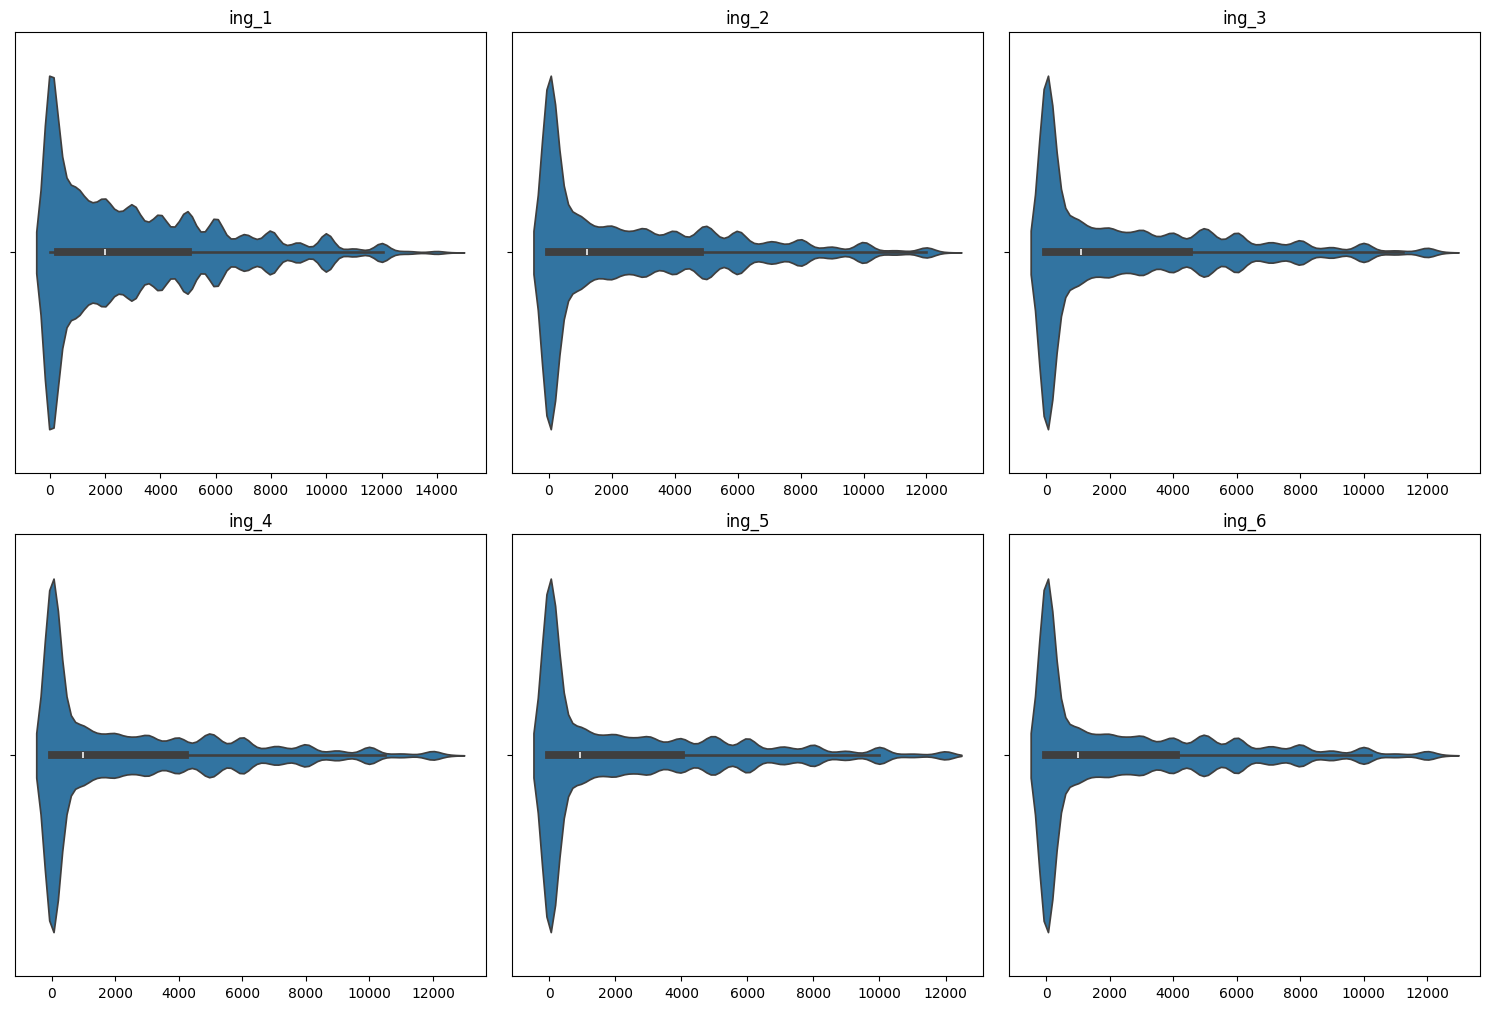

In [33]:
# Definir el tamaño de la cuadrícula
n_cols = len(df_ingresos.columns)
n_filas = (n_cols // 3) + 1

# Crear la figura y los ejes
fig, axes = plt.subplots(n_filas, 3, figsize=(15, n_filas * 5))
axes = axes.flatten()

# Graficar cada columna en un histograma
for i, col in enumerate(df_ingresos.columns):
    sns.violinplot(x=df_ingresos[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Eliminar ejes vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()
plt.show()